# <u> Zombie-19: Contagion Horror Becomes Reality? </u>

![Zombies](zombie.jpg "Zombie")

[Image by Charlie Adlard](https://charlieadlard.com/)

# Introduction

### Zombie-19 is an exploration of contagion horror (i.e. Zombies) , it's popularity in entertainment media, and it's influence on the COVID-19 pandemic. Contagion horror is a genre of horror that has been present in various forms of literature and media since the earliest human writings and forms of entertainment, which preys on fear of infection and contamination, and contains themes of apocalypse and plague (Sartin 2019). The COVID-19 pandemic was a shocking and foriegn experience to many, while exposure to contagion horror is not. With the growing popularity of contagion horror in media and entertainment, and the COVID-19 pandemic being frightening and unfamiliar, I hypothesized that contagion horror in popular media has influence over the way people think about the COVID-19 Pandemic.



## Research Question: Has the increasing popularity and high exposure of contagion horror in American media influenced the way society thinks about the COVID-19 Pandemic?

# Libraries Used for Analysis

In [1]:
# My Twitter Datasets from Kaggle
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install tweepy 
# (Twitter API client)
import tweepy

In [226]:
#Wordcloud
!pip install wordcloud
!pip install gensim
!pip install wordcloud
!pip install pyldavis

In [228]:
#Text analysis 
from collections import Counter # Count most common words
import gensim # word2vec model
%matplotlib inline
import nltk # natural language toolkit
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews # another dataset 
import pyLDAvis.sklearn # visualize our topic models!
import re # regular expressions
# CV (multiple train/test splitting)
from sklearn.model_selection import cross_val_score, train_test_split
# Algorithms (unsupervised)
from sklearn.decomposition import LatentDirichletAllocation, PCA
# (supervised)
from sklearn.linear_model import LogisticRegression
# Tools to create our DTMs
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
# Speed up your machine learning setup
from sklearn.pipeline import Pipeline
# Mix up our training and test sets
from sklearn.utils import shuffle
# Super awesome NLP library
import spacy
# Visualize word clouds 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

# Twitter Analysis (API and Kaggle Datasets)

## Inspired by Google Trends "Zombie Apocalypse"

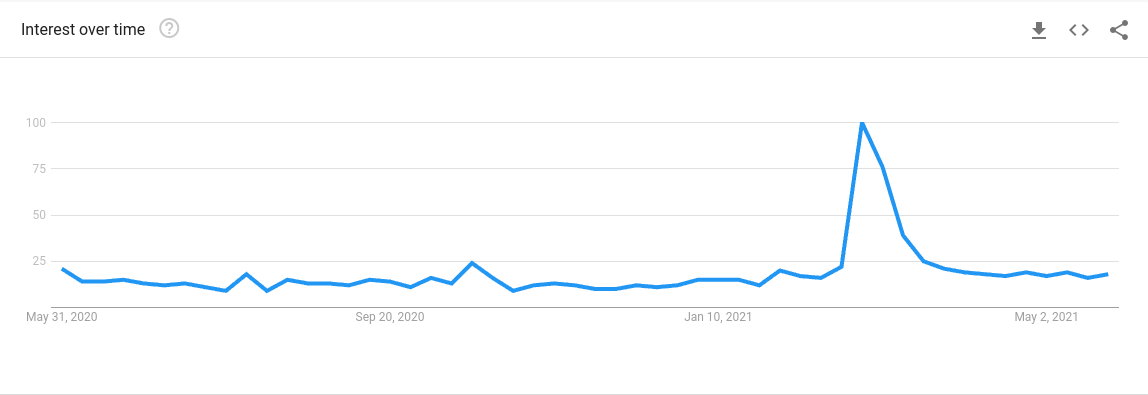

#### Peaks from 02/28/2021-03/06/2021

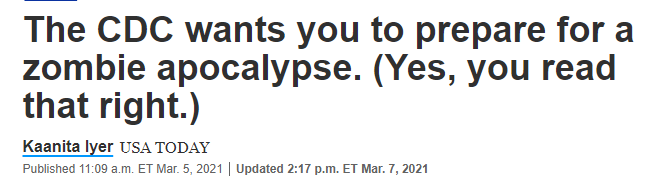

### Does it have something to do with the CDC releasing a zombie preperation guideline?

## Twitter API. Creation of my datasets. 

In [3]:
auth = tweepy.OAuthHandler("BqHFKQU7AlUkDF7mi7WOKsvUB", "hML0s4CLN4JAGfnJgwzErDnybrf27wGqdNHkS6DIBdvjOxSGex")
auth.set_access_token("1405593547756036096-sB0fC8SHn6or4jGtbk3FJNy9KV30Do", "FhZWebwSWMhXhOkO8IMFqSIk3ZvPGpHi3SYo1MJlZoqGv")

api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

In [4]:
try:
    api.verify_credentials()
    print("Success!")
except:
    print("Invalid authentication")

Success!


### Use the search_full_archive function, search words "Covid and the zombie apocalypse" (Only 100 Tweets) :(

In [ ]:
search_words = "Covid and the zombie apocalypse"
date_since = "202102280000"
date_to = "202103062359"
feb_tweets=api.search_full_archive (environment_name='confused',query=search_words , fromDate=date_since, toDate=date_to, )
#print(feb_tweets)

### Turn this into a dataset

In [7]:
json_data = [r._json for r in feb_tweets]

febtomar = pd.json_normalize(json_data)
febtomar

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.extended_entities.media,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.bounding_box.type,place.bounding_box.coordinates
0,Sat Mar 06 21:33:59 +0000 2021,1368313936643297287,1368313936643297287,@TommyPistol I have a friend who kept saying m...,"[13, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.368312e+18,1368311502105550849,3.879344e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Mar 06 21:20:00 +0000 2021,1368310418461106185,1368310418461106185,To help people become better prepared to withs...,NaN,"<a href=""http://www.socialnewsdesk.com"" rel=""n...",True,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat Mar 06 06:09:43 +0000 2021,1368081337383542784,1368081337383542784,I love how positively and seriously the tl is ...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sat Mar 06 04:28:09 +0000 2021,1368055779383775233,1368055779383775233,This one did it for me.\n\nTook another call a...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.368056e+18,1368055778721083392,3.649076e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Mar 06 03:02:13 +0000 2021,1368034151866249219,1368034151866249219,Also if you are thirsty do not eat it will exh...,NaN,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Sun Feb 28 20:20:37 +0000 2021,1366121148497334275,1366121148497334275,@UrbaniteAlaska @purrenrage The only way we ar...,"[28, 140]","<a href=""http://twitter.com/download/android"" ...",True,1.366097e+18,1366096723324461056,3.195622e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Sun Feb 28 17:47:50 +0000 2021,1366082696254869510,1366082696254869510,"Fuck it, release Covid-21. Let's have a full b...",NaN,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Sun Feb 28 14:56:03 +0000 2021,1366039468965257222,1366039468965257222,@Bigdogdigs One good thing about a zombie apoc...,"[12, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.366038e+18,1366038194521837573,6.297838e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Sun Feb 28 08:55:46 +0000 2021,1365948800666398720,1365948800666398720,And also now looking back at this strange thin...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Standardization, reducing my dataset

In [9]:
febtomar.rename(columns = {"created_at":"Time",
                       "text":"Tweet"},
            inplace = True)
febtomar.columns

Index(['Time', 'id', 'id_str', 'Tweet', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id',
       ...
       'quoted_status.extended_entities.media', 'place.id', 'place.url',
       'place.place_type', 'place.name', 'place.full_name',
       'place.country_code', 'place.country', 'place.bounding_box.type',
       'place.bounding_box.coordinates'],
      dtype='object', length=249)

In [10]:
febtomar['Time'] = pd.to_datetime(febtomar['Time'])

In [11]:
firstcovidtweets=febtomar.iloc[:, [0,3]]

In [12]:
firstcovidtweets.to_csv("firstofcoviddataset.csv")

In [13]:
firstcovidtweets

,Time,Tweet
0,2021-03-06 21:33:59+00:00,@TommyPistol I have a friend who kept saying m...
1,2021-03-06 21:20:00+00:00,To help people become better prepared to withs...
2,2021-03-06 06:09:43+00:00,I love how positively and seriously the tl is ...
3,2021-03-06 04:28:09+00:00,This one did it for me.\n\nTook another call a...
4,2021-03-06 03:02:13+00:00,Also if you are thirsty do not eat it will exh...
...,...,...
69,2021-02-28 20:20:37+00:00,@UrbaniteAlaska @purrenrage The only way we ar...
70,2021-02-28 17:47:50+00:00,"Fuck it, release Covid-21. Let's have a full b..."
71,2021-02-28 14:56:03+00:00,@Bigdogdigs One good thing about a zombie apoc...
72,2021-02-28 08:55:46+00:00,And also now looking back at this strange thin...


In [382]:
pd.set_option("display.max_colwidth", None)
#firstcovidtweets

In [383]:
list(firstcovidtweets[0:5]["Tweet"])

['@TommyPistol I have a friend who kept saying mankind could pull through a zombie apocalypse, particularly the walki… https://t.co/rCimoMqc6L',
 'To help people become better prepared to withstand natural disasters and other unforeseen events — such as the COVI… https://t.co/F1Yb0y8q6l',
 'I love how positively and seriously the tl is discussing about zombie apocalypse surviving. We all went after covid, anything is possible.',
 'This one did it for me.\n\nTook another call asking about COVID-15 (???), the zombie apocalypse, and how a he (who ad… https://t.co/Yrho6nd9YR',
 "Also if you are thirsty do not eat it will exhausturbate the dehydration if you have to eat avoid salty foods \n\nI'm… https://t.co/gbmMiBa7hg"]

### Cleaning unnecessary punctuation and urls :)

In [385]:
firstcovidtweets["Text_processed"] = firstcovidtweets["Tweet"].map(lambda x: re.sub('[,\.!?]', '', x))
firstcovidtweets["Text_processed"] = firstcovidtweets["Text_processed"].map(lambda x: x.lower())
firstcovidtweets['Text_processed'] = firstcovidtweets['Text_processed'].str.replace('\d+', '')
firstcovidtweets['Text_processed'] = firstcovidtweets['Text_processed'].str.replace('https', '')
firstcovidtweets['Text_processed'] = firstcovidtweets['Text_processed'].str.replace('tco', '')
firstcovidtweets['Text_processed'] = firstcovidtweets['Text_processed'].str.replace('becca_oneal', '')
firstcovidtweets['Text_processed'] = firstcovidtweets['Text_processed'].str.replace('rt', '')
list(firstcovidtweets[0:2]["Text_processed"])

<ipython-input-385-dbcf3465dc46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstcovidtweets["Text_processed"] = firstcovidtweets["Tweet"].map(lambda x: re.sub('[,\.!?]', '', x))
<ipython-input-385-dbcf3465dc46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstcovidtweets["Text_processed"] = firstcovidtweets["Text_processed"].map(lambda x: x.lower())
<ipython-input-385-dbcf3465dc46>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  firstcovidtweets

['@tommypistol i have a friend who kept saying mankind could pull through a zombie apocalypse paicularly the walki… :///rcimomqcl',
 'to help people become better prepared to withstand natural disasters and other unforeseen events — such as the covi… :///fybyql']

In [373]:
long_string = ','.join(list(firstcovidtweets["Text_processed"].values))
#long_string

### Looking at word frequency for context

In [420]:
cz_tokens = long_string.split()
stop = stopwords.words("english")
no_stops = [word for word in cz_tokens if word not in stopwords.words('english')]
cz_df = pd.DataFrame(freq_cz.most_common(10), columns = ["Word", "Frequency"])
cz_df

,Word,Frequency
0,zombie,47
1,apocalypse,39
2,covid,35
3,cdc,19
4,covid-,13
5,know,11
6,us,10
7,would,10
8,people,8
9,survive,8


In [281]:
vectorizer = CountVectorizer()
vectorizer.fit(firstcovidtweets["Text_processed"])
vectorizer.vocabulary

In [282]:
vector = vectorizer.transform(firstcovidtweets["Text_processed"])

In [283]:
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    stop_words = "english",
                                    token_pattern = r'\b\w+\b', 
                                    min_df = 1)
bigram_vectorizer

CountVectorizer(ngram_range=(1, 2), stop_words='english',
                token_pattern='\\b\\w+\\b')

In [284]:
analyze = bigram_vectorizer.build_analyzer()
vocab = analyze(long_string)
freq = Counter(vocab)
stop_df = pd.DataFrame(freq.most_common(15), columns = ["Word", "Frequency"])
new_df = stop_df.drop([0,1,2,3])
stop_df

,Word,Frequency
0,covid,52
1,zombie,47
2,apocalypse,42
3,zombie apocalypse,40
4,cdc,20
5,know,11
6,people,8
7,survive,8
8,zombies,8
9,m,7


## Wordcloud to get context

### A lot about survival, cdc, and the government?

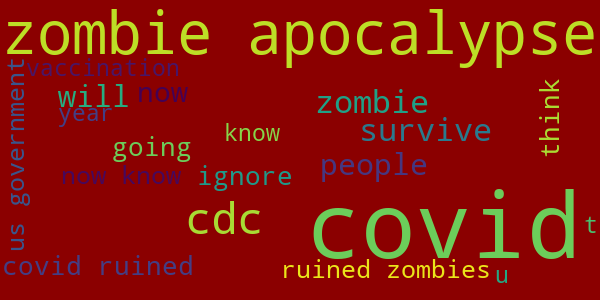

In [296]:
cloud = WordCloud(background_color = "darkred", 
                  max_words = 20, 
                  contour_width = 5, 
                  width = 600, height = 300, 
                  random_state = 5)
cloud.generate(long_string)
cloud.to_image()

## Doing the same with "Vaccine and the zombie apocalypse"

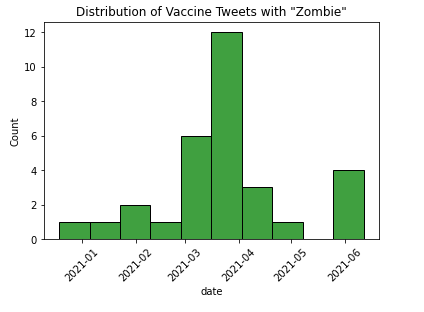

### Inspired by a later data analysis of Twitter data, but also, found interested in it from the previous wordcloud

In [428]:
search_words = "Vaccine and the zombie apocalypse"
date_since = "202103150000"
date_to = "202103302359"
vac_twts=api.search_full_archive (environment_name='confused',query=search_words , fromDate=date_since, toDate=date_to, )
#print(vac_twts)

In [393]:
json_data = [r._json for r in vac_twts]

vaczom = pd.json_normalize(json_data)
#vaczom

In [394]:
vaczom.rename(columns = {"created_at":"Time",
                       "text":"Tweet"},
            inplace = True)

In [395]:
vaczom['Time'] = pd.to_datetime(vaczom['Time'])

In [396]:
vaczom=vaczom.iloc[:, [0,3]]

In [397]:
vaczom.to_csv("vaczom.csv")

In [43]:
vaczom = pd.read_csv("vaczom.csv")
pd.set_option("display.max_colwidth", None)
vaczom.head(5)

,Unnamed: 0,Time,Tweet
0,0,2021-03-30 20:14:14+00:00,"@adampv44 @notslimpug @lucinelupita2 @ComicDaveSmith After much thought, I decided that if this is the vaccine that… https://t.co/IsOU9VOqjZ"
1,1,2021-03-30 16:07:31+00:00,@DialloKreed @Zozozoex @cruddydre_ I swear the zombie apocalypse could happen and they could release a vaccine for… https://t.co/QytYQFzJV4
2,2,2021-03-30 14:45:32+00:00,You could insert these vaccine news bits into any zombie apocalypse movie and then they would fit just fine but I d… https://t.co/TGmP0soi0A
3,3,2021-03-30 04:16:47+00:00,@resistnow51 @harrylitman A free America is dead isn't it. You idiots act like this is the fucking zombie apocalyp… https://t.co/kIMWotGEem
4,4,2021-03-30 03:57:46+00:00,@ShekinahCanCook @DrZuhdiJasser OMG... the zombie apocalypse is coming.... guess you fell right into the success co… https://t.co/TVvOdeMI2t


In [402]:
vaczom["Text_processed"] = vaczom["Tweet"].map(lambda x: re.sub('[,\.!?]', '', x))
vaczom["Text_processed"] = vaczom["Text_processed"].map(lambda x: x.lower())
vaczom['Text_processed'] = vaczom['Text_processed'].str.replace('\d+', '')
vaczom['Text_processed'] = vaczom['Text_processed'].str.replace('https', '')
vaczom['Text_processed'] = vaczom['Text_processed'].str.replace('tco', '')
vaczom['Text_processed'] = vaczom['Text_processed'].str.replace('rt', '')
list(vaczom[0:2]["Text_processed"])

<ipython-input-402-be967a531d40>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  vaczom['Text_processed'] = vaczom['Text_processed'].str.replace('\d+', '')


['@adampv @notslimpug @lucinelupita @comicdavesmith after much thought i decided that if this is the vaccine that… :///isouvoqjz',
 '@diallokreed @zozozoex @cruddydre_ i swear the zombie apocalypse could happen and they could release a vaccine for… :///qytyqfzjv']

In [406]:
long_string2 = ','.join(list(vaczom["Text_processed"].values))
#long_string2

### My second Wordcloud. More of cdc, but "legend" is interesting.

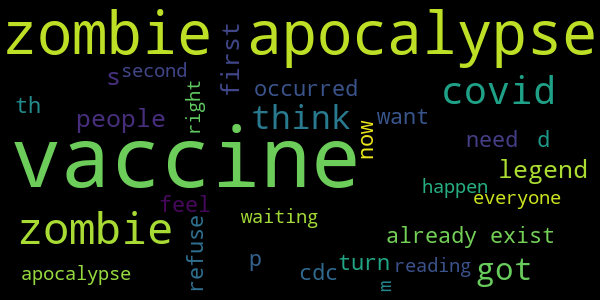

In [434]:
cloud = WordCloud(background_color = "black", 
                  max_words = 30, 
                  contour_width = 5, 
                  width = 600, height = 300, 
                  random_state = 5)
cloud.generate(long_string2)
cloud.to_image()

# Covid Tweets 07/24/2020 - 08/30/2020

In [14]:
os.getcwd()

'C:\\Users\\19092\\DIGHUM 100'

In [15]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 9029-7BDB

 Directory of C:\Users\19092\DIGHUM 100

06/24/2021  02:35 PM    <DIR>          .
06/24/2021  02:35 PM    <DIR>          ..
06/24/2021  02:35 PM    <DIR>          .ipynb_checkpoints
06/06/2021  01:22 PM        68,713,814 covid19_tweets.csv
06/19/2021  01:47 PM                 0 covidtweets.txt
06/24/2021  02:36 PM            12,729 firstofcoviddataset.csv
06/10/2021  11:13 AM    <DIR>          Hm
06/06/2021  11:56 AM         1,965,758 IMDB Horror movies.csv
06/24/2021  02:24 PM             8,490 save_as_a_png.png
06/24/2021  02:34 PM         1,150,684 StoryboardUpdate2.ipynb
06/19/2021  04:13 PM            64,786 Updated StoryBoard.ipynb
06/24/2021  02:20 PM        44,917,733 vaccination_all_tweets.csv
06/19/2021  11:56 AM            52,015 zombie.jpg
06/19/2021  12:02 PM            80,238 zombies2.jpg
              10 File(s)    116,966,247 bytes
               4 Dir(s)  12,711,157,760 bytes free


### My COVID Tweets dataset from Kaggle (100,000+ Tweets)

In [20]:
covtweets = pd.read_csv("covid19_tweets.csv")

covtweets.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


#### Getting unique Tweets

In [21]:
tdata = tweets.text.unique()

In [30]:
covtweets['date'] = pd.to_datetime(covtweets['date'])

In [57]:
max(covtweets.date)

Timestamp('2020-08-30 09:07:39')

In [58]:
min(covtweets.date)

Timestamp('2020-07-24 23:47:08')

### Creation of my graph

#### - covid tweets that contain zombie 
#### - create and label plot
#### - save figure

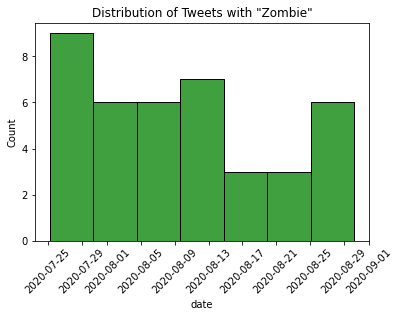

In [66]:
ct = covtweets[covtweets['text'].str.contains("zombie")]
sns.histplot(ct['date'], label='Zombie', color= 'green')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Distribution of Tweets with "Zombie"')
plt.savefig('save_as_a_png.png')

Text(0.5, 1.0, 'Distribution of Tweets with "flu"')

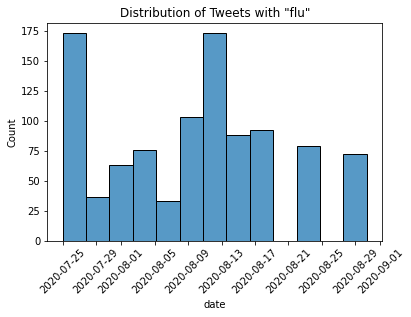

In [42]:
flu = covtweets[covtweets['text'].str.contains("flu")]
sns.histplot(flu['date'], label='iPhone')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Distribution of Tweets with "flu"')

### Unique tweets with Zombie and flu. 
#### 25x more 'flu' Tweets than 'zombie' Tweets

In [102]:
len([k for k in tdata if 'zombie' in k])

40

In [32]:
len([k for k in tdata if 'flu' in k])

982

# Vaccine Tweets Analysis 12/12/2020 - 06/23/2021 (Also 100,000+ Tweets)

### Did the same analysis here as I did with previous datasets

In [43]:
vactweets = pd.read_csv("vaccination_all_tweets.csv")

vactweets.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [166]:
vactweets.shape

(112675, 16)

In [52]:
vacdata = vactweets.text.unique()

In [53]:
vactweets['date'] = pd.to_datetime(vactweets['date'])

In [59]:
max(vactweets.date)

Timestamp('2021-06-23 19:20:59')

In [60]:
min(vactweets.date)

Timestamp('2020-12-12 11:55:28')

### Inspiration for my "Vaccine and the Zombie Apocalypse" wordcloud

Text(0.5, 1.0, 'Distribution of Vaccine Tweets with "Zombie"')

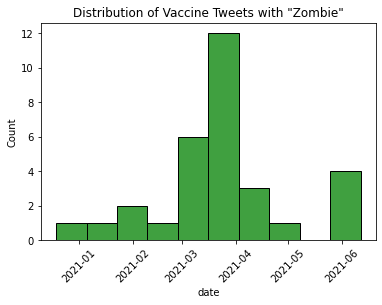

In [68]:
vt = vactweets[vactweets['text'].str.contains("zombie")]
sns.histplot(vt['date'], label='Zombie', color='green')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Distribution of Vaccine Tweets with "Zombie"')

In [63]:
len([k for k in vacdata if 'zombie' in k ])

31

Text(0.5, 1.0, 'Distribution of Vaccine Tweets with "flu"')

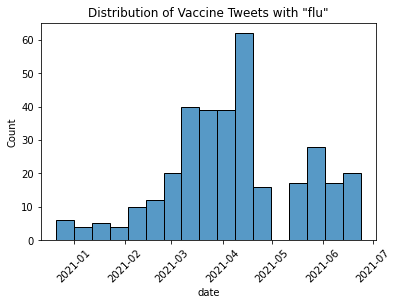

In [61]:
vtf = vactweets[vactweets['text'].str.contains("flu")]
sns.histplot(vtf['date'], label='flu')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Distribution of Vaccine Tweets with "flu"')

In [64]:
len([k for k in vacdata if 'flu' in k ])

339

#### Did this with vampire to see if results were a coincidence of not

Text(0.5, 1.0, 'Distribution of Vaccine Tweets with "vampire"')

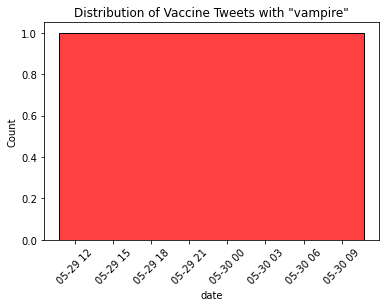

In [121]:
fun = vactweets[vactweets['text'].str.contains("vampire")]
sns.histplot(fun['date'], label='vampire', color = 'red')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Distribution of Vaccine Tweets with "vampire"')

In [65]:
len([k for k in vacdata if 'vampire' in k ])

1

# IMDB Analysis

## Inspiration from Google Ngram, crazy peak in popularity in literature in the 2000s

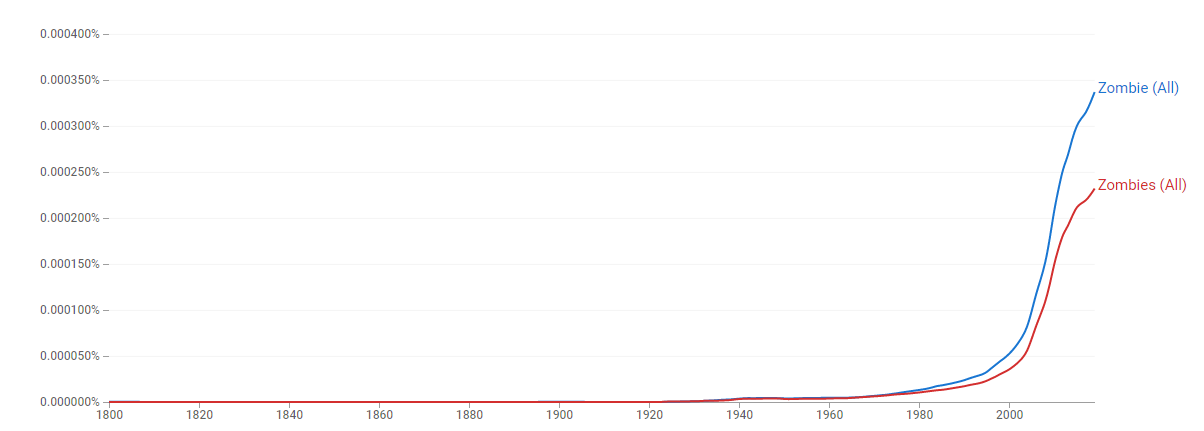

## Popular horror movies from 2012- Halloween 2017

### Are zombies popular enough to have influence??

In [70]:
IMDB = pd.read_csv("IMDB Horror movies.csv")

IMDB.head(5)

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [299]:
print(IMDB.shape)

(3328, 12)


In [91]:
IMDB['Release Date'] = pd.to_datetime(IMDB['Release Date'])

In [159]:
max(IMDB['Release Date'])

Timestamp('2017-10-31 00:00:00')

In [160]:
min(IMDB['Release Date'])

Timestamp('2012-01-01 00:00:00')

### Movies released with plot that has zombies in it during this timeline

In [156]:
IMDBzombies = IMDB.loc[IMDB['Plot'].str.contains("zombie", na=False)]

<AxesSubplot:xlabel='Release Date', ylabel='Count'>

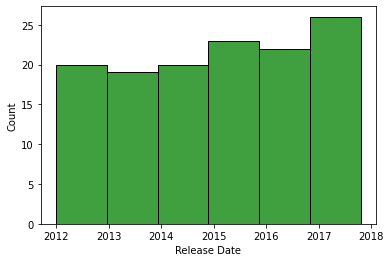

In [171]:
sns.histplot(IMDBzombies['Release Date'], label='zombie', bins=6, color = 'green')

### Horror movies released in general

<AxesSubplot:xlabel='Release Date', ylabel='Count'>

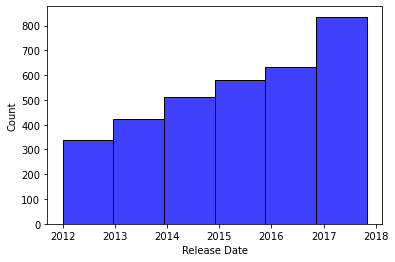

In [172]:
sns.histplot(IMDB['Release Date'], label='count',bins = 6, color = 'blue')

### Another creation of a dataframe!

In [145]:
zombiecounts = IMDB['Plot'].str.contains("zombie").value_counts()
zombiecounts

False    3197
True      130
Name: Plot, dtype: int64

In [157]:
vampirecounts = IMDB['Plot'].str.contains("vampire").value_counts()
vampirecounts

False    3255
True       72
Name: Plot, dtype: int64

In [147]:
mummycounts = IMDB['Plot'].str.contains("mummy").value_counts()
mummycounts

False    3323
True        4
Name: Plot, dtype: int64

In [149]:
werewolfcounts = IMDB['Plot'].str.contains("werewolf").value_counts()
werewolfcounts

False    3317
True       10
Name: Plot, dtype: int64

In [150]:
paranormalcounts = IMDB['Plot'].str.contains("paranormal").value_counts()
paranormalcounts

False    3259
True       68
Name: Plot, dtype: int64

In [151]:
ghostcounts = IMDB['Plot'].str.contains("ghost").value_counts()
ghostcounts

False    3197
True      130
Name: Plot, dtype: int64

In [154]:
demoncounts = IMDB['Plot'].str.contains("demon").value_counts()
demoncounts

False    3195
True      132
Name: Plot, dtype: int64

In [315]:
aliencounts = IMDB['Plot'].str.contains("alien").value_counts()
aliencounts

False    3299
True       28
Name: Plot, dtype: int64

In [323]:
beastcounts = IMDB['Plot'].str.contains("beast").value_counts()
beastcounts

False    3314
True       13
Name: Plot, dtype: int64

In [324]:
monstercounts = IMDB['Plot'].str.contains("monster").value_counts()
monstercounts

False    3265
True       62
Name: Plot, dtype: int64

In [326]:
witchcounts = IMDB['Plot'].str.contains("witch").value_counts()
witchcounts

False    3291
True       36
Name: Plot, dtype: int64

## Popular creatures dataframe

In [359]:
horrorcreatures = np.array([['creatures',' '],
                ['zombie',130],
                ['vampire',72],
                ['mummy',4],
                ['paranormal',68],
                ['ghost',130],
                ['demon',132], 
                ['alien',28], 
                ['beast',13],
                ['monster',62],
                ['witch',36],            
                ['werewolf',10]])
monsters_df =pd.DataFrame(data=horrorcreatures[1:,1:],
                  index=horrorcreatures[1:,0],
                  columns=horrorcreatures[0,1:])
monsters_df

,
zombie,130
vampire,72
mummy,4
paranormal,68
ghost,130
demon,132
alien,28
beast,13
monster,62
witch,36


In [361]:
monsters_df=monsters_df[' '].astype(float)

### My monster pie!

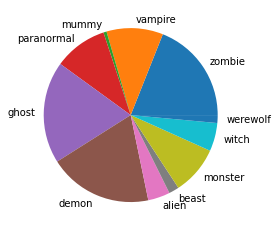

<Figure size 432x288 with 0 Axes>

In [370]:
monsters_df.plot.pie()
plt.show()
plt.savefig('monsterpie.png')

In [382]:
pd.set_option("display.max_colwidth", None)
#firstcovidtweets

# Results
### After my data analysis, my results showed that there were more Tweets that talked about COVID, the vaccine, and the flu together, than zombies which doesn't support my hypothesis but I expected it.  Although, it is notable that there are still a good amount of Tweets that mention COVID, the vaccine, and zombies in conjunction with each other. I also saw trends in the distributions that peaked my interest. Overall, I noticed that the ideas behind the Tweets were either based on the common theme of survival, being in a pandemic or a zombie apocalypse, or based on the CDC’s release of their Zombie Apocalypse Preparedness Guide. In my IMDB analysis, I noticed that zombies are very popular in entertainment. In comparison to other well-known horror movie creatures, zombies were tied with ghost for second place, only two movies each below the demon.

## Limitations
### Even though I was able to acquire results from my data, there were great limitations and setbacks. Originally, my research question was based around if contagion horror amplified fear during the COVID-19 pandemic. I soon realized that this is not something I would be able to easily conclude. Unfortunately, there were still limitations to my data, as it is extremely difficult to retrieve all Tweets from the beginning of the COVID-19 pandemic until now. Most datasets were contained in a small frame of time, but had hundreds of thousands of Tweets. Even in my own datasets, I was only limited to less than 100 Tweets. The IMDB data was not as limiting as the other datasets, yet, only had ‘popular movies’ which did not allow me to get the full scope of all movies released. 

## Conclusion
### I can not conclude from the results of my data analysis that zombies in popular entertainment or media has any effect on how we perceive the COVID-19 pandemic. I realized that this is because my research question is completely correlational and I can not determine causation from this. However, my results could possibly give an idea of what people expressed publicly on Twitter about the COVID-19 pandemic, and illustrate the scope of how popular contagion horror is in entertainment media during and before the pandemic. Overall, it is undeniable that exposure to any popular media can affect the way you think and perceive events. Though my research is only a limited part of this idea, it could inspire more research about media influence over society during the pandemic, such as other popular media like the news or other social media platforms.